In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import copy
import matplotlib.cm as cm
import matplotlib.colors as mcolors

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

# MHC

In [2]:
gene_list = ['B2M', 'TAP2', 'HLA-A', 'HLA-B', 'HLA-C', 'TAP1', 'HLA-DQB1', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DRB1', 'HLA-DPA1', 
             'HLA-DRB5', 'HLA-DQA2', 'HLA-DQB2', 'HLA-E', 'HLA-F', 'HLA-G'] # 'HLA-DRB6', 'HLA-DPB2', 'HLA-H', 
len(gene_list)

17

In [3]:
df_corr_TCGA = pd.read_csv('../../data/GO/TCGA-LIHC/Pearson_corr_with_KLRB1.csv', index_col=0)
df_corr_TCGA = df_corr_TCGA.loc[gene_list, :]
# df_corr_TCGA['P'] = -np.log10(df_corr_TCGA['pvalue'])
df_corr_TCGA['P'] = 'ns'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.05 ,'P'] = '*'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.01 ,'P'] = '**'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.001 ,'P'] = '***'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.0001 ,'P'] = '****'
df_corr_TCGA

,cor,pvalue,P
B2M,0.358514,1.640761e-12,****
TAP2,0.323745,2.368152e-10,****
HLA-A,0.370980,2.365400e-13,****
HLA-B,0.383141,3.293401e-14,****
HLA-C,0.242010,2.904682e-06,****
TAP1,0.165179,1.541800e-03,**
HLA-DQB1,0.595749,1.948842e-36,****
HLA-DPB1,0.667136,2.372302e-48,****
HLA-DQA1,0.634342,1.727571e-42,****
HLA-DRB1,0.585385,6.011931e-35,****


In [4]:
df_corr_ICGC = pd.read_csv('../../data/GO/ICGC/Pearson_corr_with_KLRB1.csv', index_col=0)
df_corr_ICGC = df_corr_ICGC.loc[gene_list, :]
# df_corr_ICGC['P'] = -np.log10(df_corr_ICGC['pvalue'])
df_corr_ICGC['P'] = 'ns'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.05 ,'P'] = '*'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.01 ,'P'] = '**'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.001 ,'P'] = '***'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.0001 ,'P'] = '****'
df_corr_ICGC

,cor,pvalue,P
B2M,0.447881,9.535996e-13,****
TAP2,0.180048,6.179673e-03,**
HLA-A,0.230172,4.330438e-04,***
HLA-B,0.369596,7.441585e-09,****
HLA-C,0.256820,8.150646e-05,****
TAP1,0.277373,1.975110e-05,****
HLA-DQB1,0.644550,2.131660e-28,****
HLA-DPB1,0.691211,5.210442e-34,****
HLA-DQA1,0.609034,9.705157e-25,****
HLA-DRB1,0.612572,4.397002e-25,****


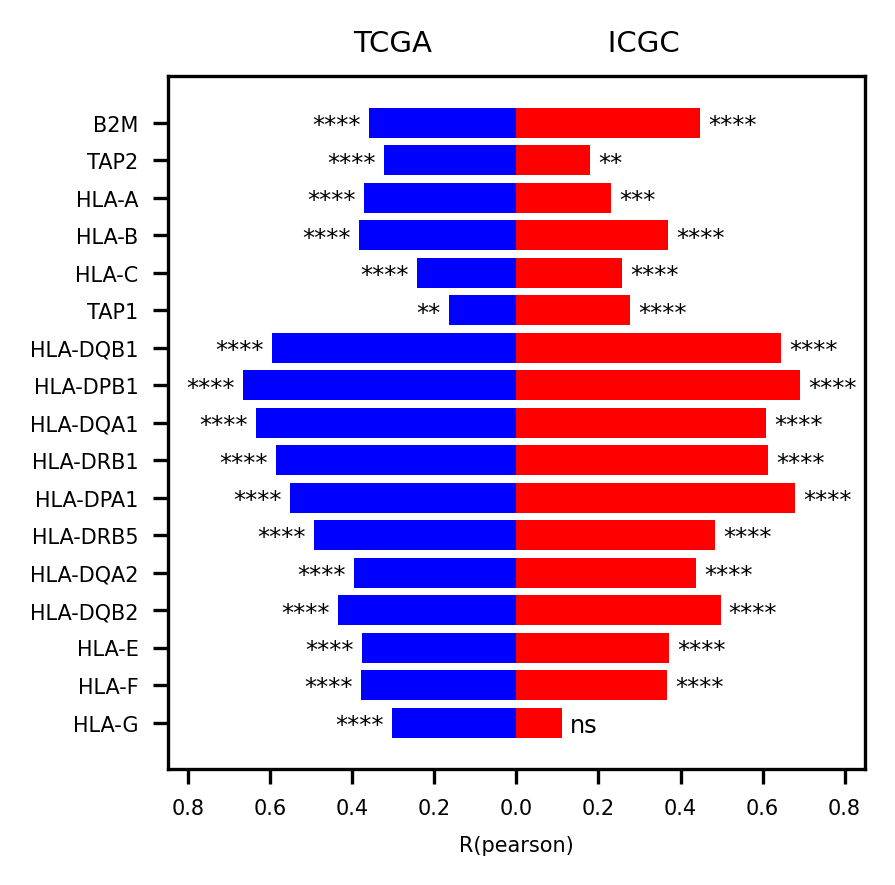

In [5]:
fig = plt.figure(figsize=(3, 3), dpi=300) # figsize=(3, 4), 
ax1 = plt.subplot(1,1,1, label="1")

# corr
ax1.barh(range(df_corr_TCGA.shape[0], 0, -1), width=-df_corr_TCGA['cor'], color='blue')
ax1.barh(range(df_corr_ICGC.shape[0], 0, -1), width=df_corr_ICGC['cor'], color='red')

ax1.set_xticks(np.linspace(-0.8, 0.8, 9))
ax1.set_xticklabels(np.abs(np.round(np.linspace(-0.8, 0.8, 9), 1)), fontsize=5)
ax1.set_yticks(range(df_corr_TCGA.shape[0], 0, -1))
ax1.set_yticklabels(df_corr_TCGA.index, fontsize=5)

ax1.set_xlim(-0.85, 0.85)

# ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_text('R(pearson)', fontsize=5)
# ax1.xaxis.set_label_position('top')
# ax1.legend(['TCGA', 'ICGC'], loc="upper left", bbox_to_anchor=(1.02, 1))

# ax1.grid(True)

for i, j in zip(range(len(df_corr_TCGA)), range(df_corr_TCGA.shape[0], 0, -1)):
    ax1.text(-df_corr_TCGA['cor'].iloc[i] - 0.02, j, df_corr_TCGA['P'].iloc[i], fontsize='xx-small', va='center_baseline', ha='right')

for i, j in zip(range(len(df_corr_ICGC)), range(df_corr_ICGC.shape[0], 0, -1)):
    ax1.text(df_corr_ICGC['cor'].iloc[i] + 0.02, j, df_corr_ICGC['P'].iloc[i], fontsize='xx-small', va='center_baseline')

# ax1.text(0.4, 0.8, '*    p < 0.05\n**   p < 0.01\n***  p < 0.001\n**** p < 0.0001'.expandtabs(), fontsize=4, family='monospace', va='center')
ax1.set_title('TCGA                   ICGC', fontsize=7)



# pvalue
# ax2 = fig.add_subplot(1, 1, 1, label="2", frame_on=False, sharey=ax1)
# ax2.plot(-df_corr_TCGA['P'], range(df_corr_TCGA.shape[0], 0, -1), '-^', color='#FFC125', markersize=3)
# ax2.plot(df_corr_ICGC['P'], range(df_corr_ICGC.shape[0], 0, -1), '-o', color='#FFC125', markersize=3)
# ax2.set_xlim(-20, 20)
# ax2.set_xticks(np.linspace(-20, 20, 9))
# ax2.set_xticklabels(np.int32(np.abs(np.linspace(-20, 20, 9))))
# ax2.set_xlabel('-log10(P)')
# ax2.legend(['TCGA', 'ICGC'], loc="lower left", bbox_to_anchor=(1.02, 0), title='-log10(P)')

if not os.path.exists('MHC_plot'):
    os.makedirs('MHC_plot')
    
plt.savefig("MHC_plot/TCGA-LIHC_MHC_plot.pdf", bbox_inches = 'tight')
plt.show()

# costimulators

In [6]:
gene_list = ['BTNL8', 'CD226', 'CD27', 'CD28', 'CD58', 'CD70', 'CD80', 'CD86', 
             'ICOS', 'ICOSLG', 'SLAMF1', 'TMIGD2', 'TNFRSF13C', 
             'TNFRSF14', 'TNFRSF18', 'TNFRSF4', 'TNFRSF8', 'TNFRSF9', 'TNFSF13', 
             'TNFSF13B', 'TNFSF15', 'TNFSF18', 'TNFSF4', 'TNFSF8', 'TNFSF9']
len(gene_list)

25

In [7]:
df_corr_TCGA = pd.read_csv('../../data/GO/TCGA-LIHC/Pearson_corr_with_KLRB1.csv', index_col=0)
df_corr_TCGA = df_corr_TCGA.loc[gene_list, :]
# df_corr_TCGA['P'] = -np.log10(df_corr_TCGA['pvalue'])
df_corr_TCGA['P'] = 'ns'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.05 ,'P'] = '*'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.01 ,'P'] = '**'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.001 ,'P'] = '***'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.0001 ,'P'] = '****'
df_corr_TCGA

,cor,pvalue,P
BTNL8,0.071384,1.735612e-01,ns
CD226,0.635043,1.316833e-42,****
CD27,0.602361,2.046200e-37,****
CD28,0.474853,6.310380e-22,****
CD58,0.154241,3.133188e-03,**
CD70,0.414539,1.367780e-16,****
CD80,0.399976,1.871281e-15,****
CD86,0.555431,6.255280e-31,****
ICOS,0.576964,8.919333e-34,****
ICOSLG,0.050108,3.397641e-01,ns


In [8]:
df_corr_ICGC = pd.read_csv('../../data/GO/ICGC/Pearson_corr_with_KLRB1.csv', index_col=0)
df_corr_ICGC = df_corr_ICGC.loc[gene_list, :]
# df_corr_ICGC['P'] = -np.log10(df_corr_ICGC['pvalue'])
df_corr_ICGC['P'] = 'ns'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.05 ,'P'] = '*'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.01 ,'P'] = '**'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.001 ,'P'] = '***'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.0001 ,'P'] = '****'
df_corr_ICGC

,cor,pvalue,P
BTNL8,0.057832,3.999251e-01,ns
CD226,0.648048,1.514885e-28,****
CD27,0.547328,2.247200e-19,****
CD28,0.582319,2.815355e-22,****
CD58,0.277572,1.947062e-05,****
CD70,0.419672,4.586681e-10,****
CD80,0.469909,4.910513e-14,****
CD86,0.602176,4.377471e-24,****
ICOS,0.626206,2.432323e-26,****
ICOSLG,0.135611,3.988475e-02,*


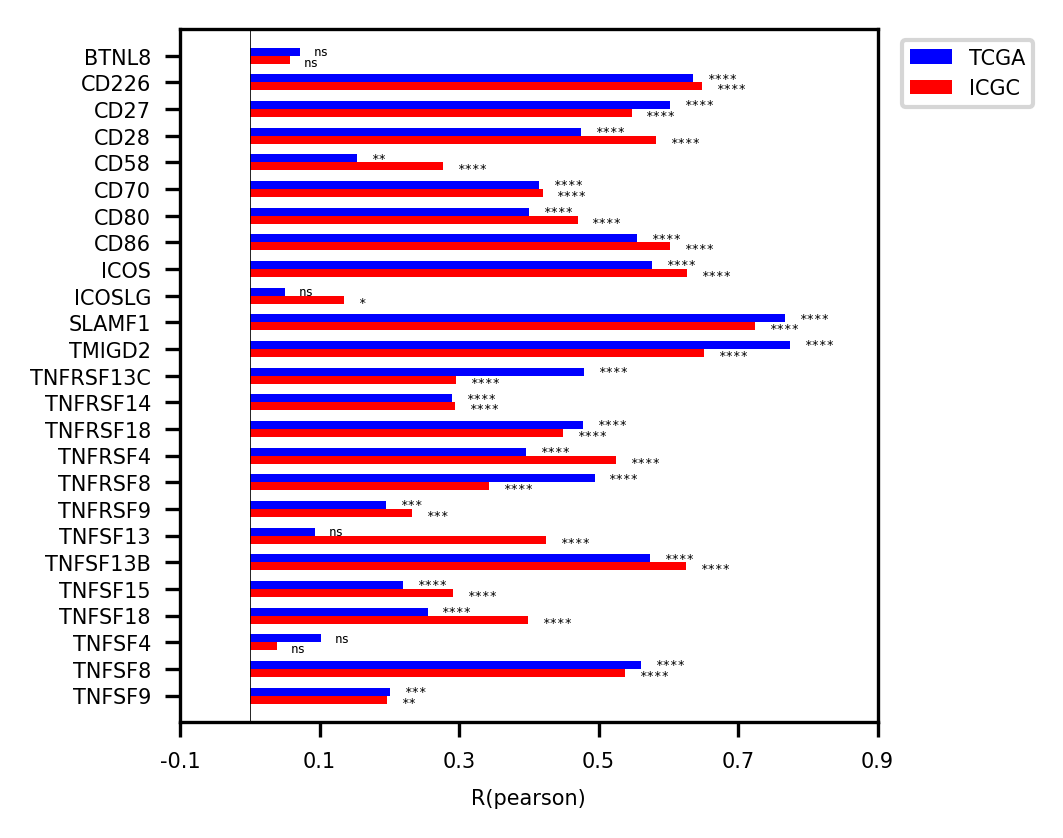

In [9]:
fig = plt.figure(figsize=(3, 3), dpi=300) # figsize=(3, 4), 
ax1 = plt.subplot(1,1,1, label="1")

height = 0.3
# corr
ax1.barh(np.arange(df_corr_TCGA.shape[0], 0, -1) + height / 2, width=df_corr_TCGA['cor'], color='blue', height=height)
ax1.barh(np.arange(df_corr_ICGC.shape[0], 0, -1) - height / 2, width=df_corr_ICGC['cor'], color='red', height=height)

ax1.set_xticks(np.linspace(-0.1, 0.9, 6))
ax1.set_xticklabels(np.round(np.linspace(-0.1, 0.9, 6), 1), fontsize=5)
ax1.set_yticks(range(df_corr_TCGA.shape[0], 0, -1))
ax1.set_yticklabels(df_corr_TCGA.index, fontsize=5)
ax1.set_xlim(-0.1, 0.9)

ax1.set_ylim(0, df_corr_TCGA.shape[0] + 1)

# ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_text('R(pearson)', fontsize=5)
# ax1.xaxis.set_label_position('top')
ax1.legend(['TCGA', 'ICGC'], loc="upper left", bbox_to_anchor=(1.02, 1), fontsize=5)

ax1.vlines(0, 0, df_corr_TCGA.shape[0] + 1, colors = "black", linewidth=0.2)
# ax1.grid(True)

for i, j in zip(range(len(df_corr_TCGA)), range(df_corr_TCGA.shape[0], 0, -1)):
    ax1.text(np.maximum(df_corr_TCGA['cor'].iloc[i] + 0.02, 0), j + height / 2, df_corr_TCGA['P'].iloc[i], fontsize=3, va='center', family='monospace')

for i, j in zip(range(len(df_corr_ICGC)), range(df_corr_ICGC.shape[0], 0, -1)):
    ax1.text(np.maximum(df_corr_ICGC['cor'].iloc[i] + 0.02, 0), j - height / 2 - 0.1, df_corr_ICGC['P'].iloc[i], fontsize=3, va='center', family='monospace')

# ax1.text(0.65, 4, '*    p < 0.05\n**   p < 0.01\n***  p < 0.001\n**** p < 0.0001'.expandtabs(), fontsize=4, family='monospace', va='center')
# ax1.set_title('TCGA                   ICGC', fontsize=7)



# pvalue
# ax2 = fig.add_subplot(1, 1, 1, label="2", frame_on=False, sharey=ax1)
# ax2.plot(-df_corr_TCGA['P'], range(df_corr_TCGA.shape[0], 0, -1), '-^', color='#FFC125', markersize=3)
# ax2.plot(df_corr_ICGC['P'], range(df_corr_ICGC.shape[0], 0, -1), '-o', color='#FFC125', markersize=3)
# ax2.set_xlim(-20, 20)
# ax2.set_xticks(np.linspace(-20, 20, 9))
# ax2.set_xticklabels(np.int32(np.abs(np.linspace(-20, 20, 9))))
# ax2.set_xlabel('-log10(P)')
# ax2.legend(['TCGA', 'ICGC'], loc="lower left", bbox_to_anchor=(1.02, 0), title='-log10(P)')

if not os.path.exists('MHC_plot'):
    os.makedirs('MHC_plot')
    
plt.savefig("MHC_plot/TCGA-LIHC_costimulators_plot.pdf", bbox_inches = 'tight')
plt.show()

# chemokines and receptors 

In [10]:
gene_list = ['CCL2', 'CCL3', 'CCL4', 'CCL5', 'CCL8', 'CCL13', 'CCL14', 'CCL15', 'CCL16', 'CCL17', 'CCL18', 'CCL19', 'CCL20', 'CCL21', 'CCL22', 'CCL23', 'CCL24', 'CCL25', 'CCL28', # ,'CCL1',  'CCL6', 'CCL7', 'CCL9', 'CCL10', 'CCL11', 'CCL12', 'CCL26', 'CCL27', 
             'CCR1', 'CCR2', 'CCR4', 'CCR5', 'CCR7', 'CCR8', 'CCR10', # 'CCR3', 'CCR9', 'CCR6', 
             'CXCL1', 'CXCL2', 'CXCL3', 'CXCL9', 'CXCL10', 'CXCL11', 'CXCL12', 'CXCL13', 'CXCL14', 'CXCL16', # 'CXCL4', 'CXCL5', 'CXCL6', 'CXCL7', 'CXCL8', 'CXCL15', 'CXCL17', 
             'CXCR1', 'CXCR2', 'CXCR3', 'CXCR4', 'CXCR6',  # 'CXCR7', 'CXCR8', 'CXCR9', 'CXCR10', 'CXCR11', 'CXCR12', 'CXCR13', 'CXCR14', 'CXCR15', 'CXCR16', 'CXCR17', 'CXCR5', 
             'CX3CL1', 'CX3CR1', 'XCL1', 'XCL2'] # 'PF4', 'PPBP',
len(gene_list)

45

In [11]:
df_corr_TCGA = pd.read_csv('../../data/GO/TCGA-LIHC/Pearson_corr_with_KLRB1.csv', index_col=0)
df_corr_TCGA = df_corr_TCGA.loc[gene_list, :]
# df_corr_TCGA['P'] = -np.log10(df_corr_TCGA['pvalue'])
df_corr_TCGA['P'] = 'ns'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.05 ,'P'] = '*'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.01 ,'P'] = '**'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.001 ,'P'] = '***'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.0001 ,'P'] = '****'
df_corr_TCGA

,cor,pvalue,P
CCL2,0.429776,7.704642e-18,****
CCL3,0.393482,5.768314e-15,****
CCL4,0.566564,2.243205e-32,****
CCL5,0.736668,1.211821e-63,****
CCL8,0.315925,6.663873e-10,****
CCL13,0.466160,4.324722e-21,****
CCL14,0.025668,6.249992e-01,ns
CCL15,0.075941,1.476262e-01,ns
CCL16,-0.093681,7.384529e-02,ns
CCL17,0.578407,5.648998e-34,****


In [12]:
df_corr_ICGC = pd.read_csv('../../data/GO/ICGC/Pearson_corr_with_KLRB1.csv', index_col=0)
df_corr_ICGC = df_corr_ICGC.loc[gene_list, :]
# df_corr_ICGC['P'] = -np.log10(df_corr_ICGC['pvalue'])
df_corr_ICGC['P'] = 'ns'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.05 ,'P'] = '*'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.01 ,'P'] = '**'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.001 ,'P'] = '***'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.0001 ,'P'] = '****'
df_corr_ICGC

,cor,pvalue,P
CCL2,0.599732,7.423871e-24,****
CCL3,0.515630,5.045287e-17,****
CCL4,0.571919,2.230051e-21,****
CCL5,0.667704,4.688566e-31,****
CCL8,0.404054,2.098131e-10,****
CCL13,0.270286,6.439072e-05,****
CCL14,0.322767,5.648165e-07,****
CCL15,-0.199161,2.409882e-03,**
CCL16,-0.147379,2.606017e-02,*
CCL17,0.400396,1.207723e-09,****


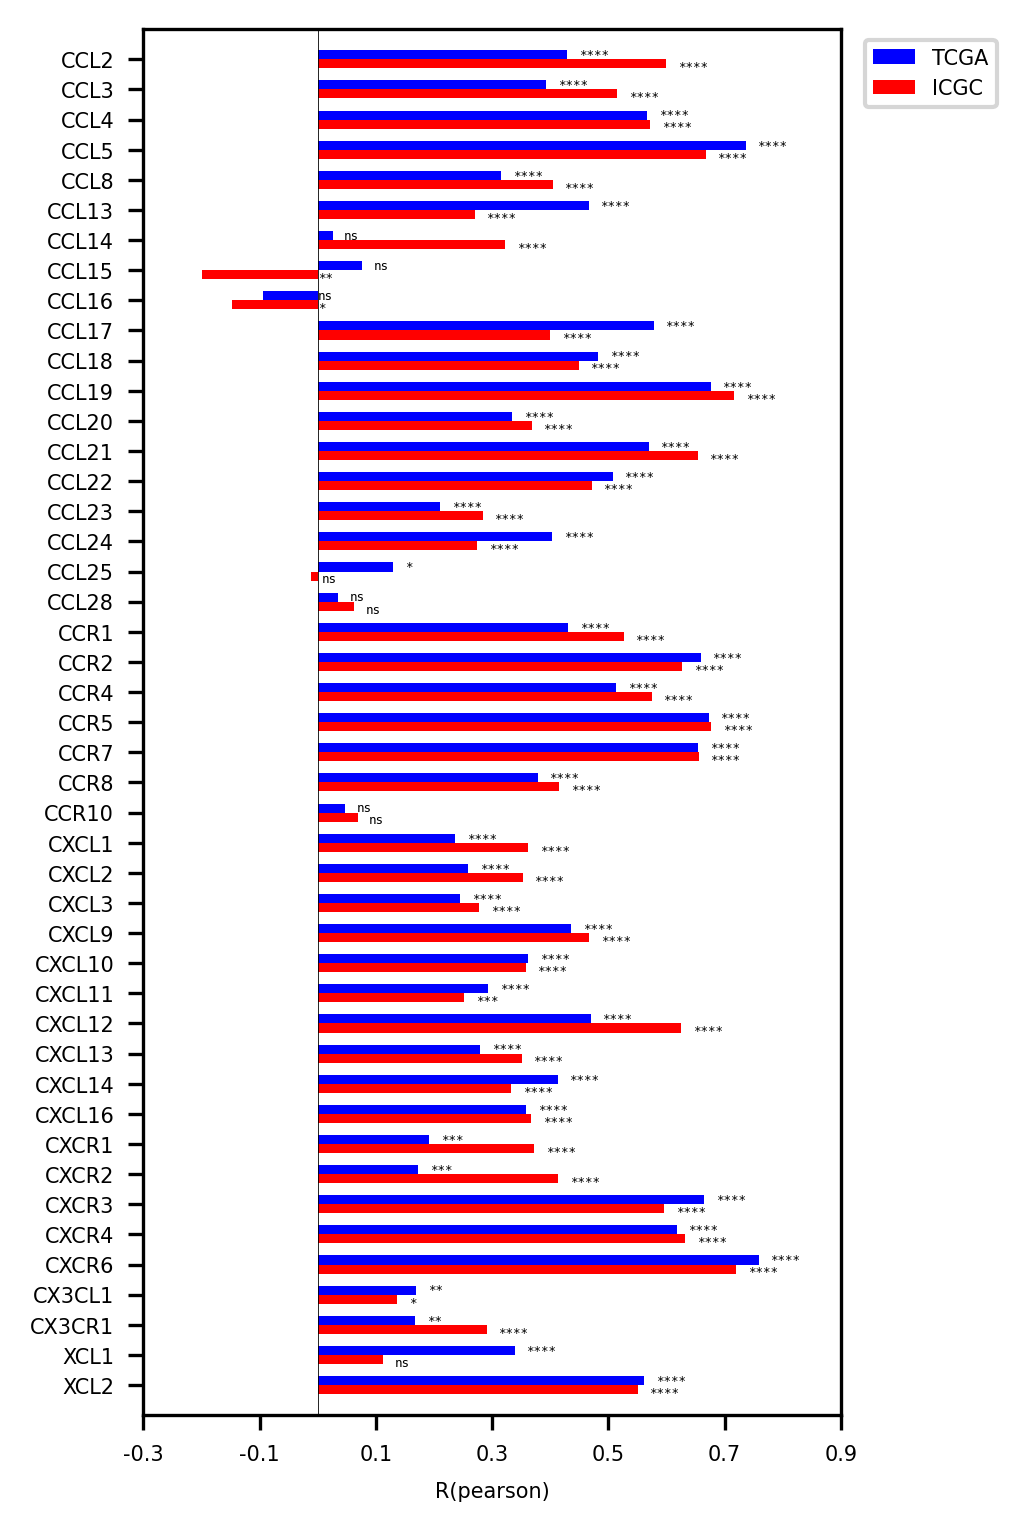

In [13]:
fig = plt.figure(figsize=(3, 6), dpi=300) # figsize=(3, 4), 
ax1 = plt.subplot(1,1,1, label="1")

height = 0.3
# corr
ax1.barh(np.arange(df_corr_TCGA.shape[0], 0, -1) + height / 2, width=df_corr_TCGA['cor'], color='blue', height=height)
ax1.barh(np.arange(df_corr_ICGC.shape[0], 0, -1) - height / 2, width=df_corr_ICGC['cor'], color='red', height=height)

ax1.set_xticks(np.linspace(-0.3, 0.9, 7))
ax1.set_xticklabels(np.round(np.linspace(-0.3, 0.9, 7), 1), fontsize=5)
ax1.set_yticks(range(df_corr_TCGA.shape[0], 0, -1))
ax1.set_yticklabels(df_corr_TCGA.index, fontsize=5)
ax1.set_xlim(-0.3, 0.9)

ax1.set_ylim(0, df_corr_TCGA.shape[0] + 1)

# ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_text('R(pearson)', fontsize=5)
# ax1.xaxis.set_label_position('top')
ax1.legend(['TCGA', 'ICGC'], loc="upper left", bbox_to_anchor=(1.02, 1), fontsize=5)

ax1.vlines(0, 0, df_corr_TCGA.shape[0] + 1, colors = "black", linewidth=0.2)
# ax1.grid(True)

for i, j in zip(range(len(df_corr_TCGA)), range(df_corr_TCGA.shape[0], 0, -1)):
    ax1.text(np.maximum(df_corr_TCGA['cor'].iloc[i] + 0.02, 0), j + height / 2, df_corr_TCGA['P'].iloc[i], fontsize=3, va='center', family='monospace')

for i, j in zip(range(len(df_corr_ICGC)), range(df_corr_ICGC.shape[0], 0, -1)):
    ax1.text(np.maximum(df_corr_ICGC['cor'].iloc[i] + 0.02, 0), j - height / 2 - 0.1, df_corr_ICGC['P'].iloc[i], fontsize=3, va='center', family='monospace')

# ax1.text(0.6, 2, '*    p < 0.05\n**   p < 0.01\n***  p < 0.001\n**** p < 0.0001'.expandtabs(), fontsize=4, family='monospace', va='center')
# ax1.set_title('TCGA                   ICGC', fontsize=7)

# pvalue
# ax2 = fig.add_subplot(1, 1, 1, label="2", frame_on=False, sharey=ax1)
# ax2.plot(-df_corr_TCGA['P'], range(df_corr_TCGA.shape[0], 0, -1), '-^', color='#FFC125', markersize=3)
# ax2.plot(df_corr_ICGC['P'], range(df_corr_ICGC.shape[0], 0, -1), '-o', color='#FFC125', markersize=3)
# ax2.set_xlim(-20, 20)
# ax2.set_xticks(np.linspace(-20, 20, 9))
# ax2.set_xticklabels(np.int32(np.abs(np.linspace(-20, 20, 9))))
# ax2.set_xlabel('-log10(P)')
# ax2.legend(['TCGA', 'ICGC'], loc="lower left", bbox_to_anchor=(1.02, 0), title='-log10(P)')

if not os.path.exists('MHC_plot'):
    os.makedirs('MHC_plot')
    
plt.savefig("MHC_plot/TCGA-LIHC_chemokines_plot.pdf", bbox_inches = 'tight')
plt.show()

# interleukines and receptors

interleukines：https://www.genenames.org/data/genegroup/#!/group/601

receptors：https://www.genenames.org/data/genegroup/#!/group/602

gene_list = ['IL10', 'IL10RA', 'IL10RB', 'IL11', 'IL11RA', 'IL12A', 'IL12B', 'IL12RB1', 'IL12RB2', 
             'IL16', 'IL17B', 'IL17D', 'IL17RD', 'IL18', 'IL1A', 'IL1B', 'IL1R1', 'IL1R2', 
             'IL20RA', 'IL20RB', 'IL21', 'IL21R', 'IL22', 'IL23A', 'IL24', 'IL26', 'IL27', 
             'IL27RA', 'IL2RA', 'IL2RB', 'IL2RG', 'IL31RA', # , 'IL28A', 'IL28B', 'IL29'
             'IL32', 'IL33', 'IL34', 'IL3RA', 'IL4R', 'IL5', 'IL6', 'IL6R', 'IL7R', 'IL9R'] # , 'IL8'

In [14]:
gene_list = ['IL1B', 'IL1RN', 'IL6', 'IL7', 'IL10', # , 'CXCL8', 'IL1A', 'IL1F10', 'IL2', 'IL3', 'IL4', 'IL5', 'IL9', 
             'IL11', 'IL12A', 'IL15', 'IL16','IL17D', 'IL18', #  'IL17A', 'IL17B', 'IL17C', 'IL17F', 'IL19', 'IL20', 'IL12B', 'IL13', 
             'IL23A', 'IL24', 'IL27', 'IL32', 'IL33', 'IL34', # 'IL21', 'IL22', 'IL25', 'IL26', 'IL31', , 'IL36A', 'IL36B', 'IL36G', 'IL36RN', 'IL37'
             'CXCR1', 'CXCR2', 'IL1RAP', 'IL1RL1', 'IL1RL2', 'IL1R1',  # 'IL1RAPL1', 'IL1RAPL2', 
             'IL1R2', 'IL2RA', 'IL2RB', 'IL2RG', 'IL4R', 'IL6R', 'IL6ST',  # 'IL3RA', 'IL5RA', 
             'IL7R', 'IL10RA', 'IL10RB', 'IL11RA', 'IL12RB1', 'IL12RB2', 'IL13RA1',  # 'IL9R', 
             'IL13RA2', 'IL15RA', 'IL17RA', 'IL17RB', 'IL17RC', 'IL17RD', 'IL17RE', 'IL18RAP', 
             'IL18R1', 'IL20RB', 'IL21R', 'IL22RA1', 'IL27RA'] # 'IL20RA', 'IL22RA2', 'IL31RA'
len(gene_list)

50

In [15]:
df_corr_TCGA = pd.read_csv('../../data/GO/TCGA-LIHC/Pearson_corr_with_KLRB1.csv', index_col=0)
df_corr_TCGA = df_corr_TCGA.loc[gene_list, :]
# df_corr_TCGA['P'] = -np.log10(df_corr_TCGA['pvalue'])
df_corr_TCGA['P'] = 'ns'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.05 ,'P'] = '*'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.01 ,'P'] = '**'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.001 ,'P'] = '***'
df_corr_TCGA.loc[df_corr_TCGA['pvalue'] < 0.0001 ,'P'] = '****'
df_corr_TCGA

,cor,pvalue,P
IL1B,0.334746,5.249001e-11,****
IL1RN,0.223517,1.630342e-05,****
IL6,0.291698,1.364997e-08,****
IL7,0.238002,4.272514e-06,****
IL10,0.331221,8.562961e-11,****
IL11,0.046412,3.766187e-01,ns
IL12A,0.212205,4.371647e-05,****
IL15,0.362813,8.493935e-13,****
IL16,0.654199,5.957867e-46,****
IL17D,0.075836,1.481884e-01,ns


In [16]:
df_corr_ICGC = pd.read_csv('../../data/GO/ICGC/Pearson_corr_with_KLRB1.csv', index_col=0)
df_corr_ICGC = df_corr_ICGC.loc[gene_list, :]
# df_corr_ICGC['P'] = -np.log10(df_corr_ICGC['pvalue'])
df_corr_ICGC['P'] = 'ns'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.05 ,'P'] = '*'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.01 ,'P'] = '**'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.001 ,'P'] = '***'
df_corr_ICGC.loc[df_corr_ICGC['pvalue'] < 0.0001 ,'P'] = '****'
df_corr_ICGC

,cor,pvalue,P
IL1B,0.374191,5.464381e-09,****
IL1RN,0.160952,1.454129e-02,*
IL6,0.466447,6.634043e-13,****
IL7,0.327460,3.776881e-07,****
IL10,0.475663,6.197694e-14,****
IL11,NaN,NaN,ns
IL12A,0.151614,2.172958e-02,*
IL15,0.425651,1.544792e-11,****
IL16,0.721463,2.961478e-38,****
IL17D,0.136395,3.874026e-02,*


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


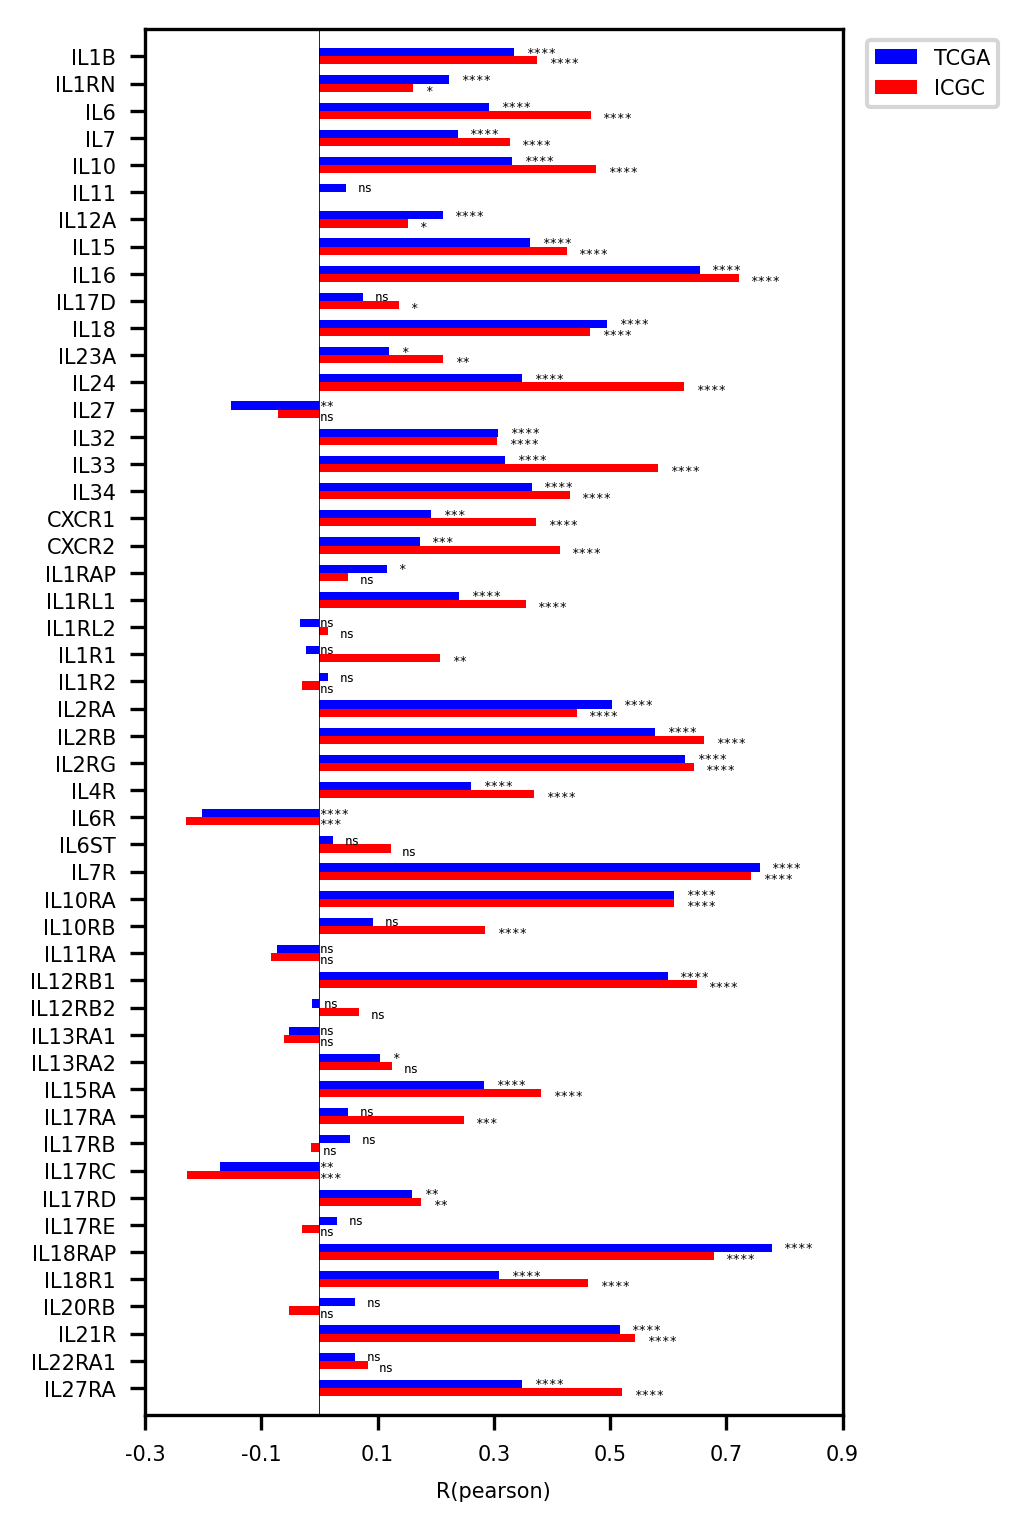

In [17]:
fig = plt.figure(figsize=(3, 6), dpi=300) # figsize=(3, 4), 
ax1 = plt.subplot(1,1,1, label="1")

height = 0.3
# corr
ax1.barh(np.arange(df_corr_TCGA.shape[0], 0, -1) + height / 2, width=df_corr_TCGA['cor'], color='blue', height=height)
ax1.barh(np.arange(df_corr_ICGC.shape[0], 0, -1) - height / 2, width=df_corr_ICGC['cor'], color='red', height=height)

ax1.set_xticks(np.linspace(-0.3, 0.9, 7))
ax1.set_xticklabels(np.round(np.linspace(-0.3, 0.9, 7), 1), fontsize=5)
ax1.set_yticks(range(df_corr_TCGA.shape[0], 0, -1))
ax1.set_yticklabels(df_corr_TCGA.index, fontsize=5)
ax1.set_xlim(-0.3, 0.9)

ax1.set_ylim(0, df_corr_TCGA.shape[0] + 1)

# ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_text('R(pearson)', fontsize=5)
# ax1.xaxis.set_label_position('top')
ax1.legend(['TCGA', 'ICGC'], loc="upper left", bbox_to_anchor=(1.02, 1), fontsize=5)

ax1.vlines(0, 0, df_corr_TCGA.shape[0] + 1, colors = "black", linewidth=0.2)
# ax1.grid(True)

for i, j in zip(range(len(df_corr_TCGA)), range(df_corr_TCGA.shape[0], 0, -1)):
    ax1.text(np.maximum(df_corr_TCGA['cor'].iloc[i] + 0.02, 0), j + height / 2, df_corr_TCGA['P'].iloc[i], fontsize=3, va='center', family='monospace')

for i, j in zip(range(len(df_corr_ICGC)), range(df_corr_ICGC.shape[0], 0, -1)):
    ax1.text(np.maximum(df_corr_ICGC['cor'].iloc[i] + 0.02, 0), j - height / 2 - 0.1, df_corr_ICGC['P'].iloc[i], fontsize=3, va='center', family='monospace')

# ax1.text(0.6, 2, '*    p < 0.05\n**   p < 0.01\n***  p < 0.001\n**** p < 0.0001'.expandtabs(), fontsize=4, family='monospace', va='center')
# ax1.set_title('TCGA                   ICGC', fontsize=7)



# pvalue
# ax2 = fig.add_subplot(1, 1, 1, label="2", frame_on=False, sharey=ax1)
# ax2.plot(-df_corr_TCGA['P'], range(df_corr_TCGA.shape[0], 0, -1), '-^', color='#FFC125', markersize=3)
# ax2.plot(df_corr_ICGC['P'], range(df_corr_ICGC.shape[0], 0, -1), '-o', color='#FFC125', markersize=3)
# ax2.set_xlim(-20, 20)
# ax2.set_xticks(np.linspace(-20, 20, 9))
# ax2.set_xticklabels(np.int32(np.abs(np.linspace(-20, 20, 9))))
# ax2.set_xlabel('-log10(P)')
# ax2.legend(['TCGA', 'ICGC'], loc="lower left", bbox_to_anchor=(1.02, 0), title='-log10(P)')

if not os.path.exists('MHC_plot'):
    os.makedirs('MHC_plot')
    
plt.savefig("MHC_plot/TCGA-LIHC_interleukines_plot.pdf", bbox_inches = 'tight')
plt.show()